In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


In [70]:
df=pd.read_excel(r'features.xls')
df.head()

,laptitude,longitude,concentration,concentration_rank,distance_to_customer,customer_credit,customer_quota
0,22.566142,113.980837,1.164764,56.0,0.000004,590.9753,39
1,22.686205,113.940525,0.921536,148.0,0.000027,301.7301,28
2,22.576512,113.957198,1.142619,61.0,0.000047,45137.6401,283
3,22.564841,114.244571,1.167558,55.0,0.000018,921.7354,48
4,22.558888,113.950723,1.180384,45.0,0.000007,953.1533,47


In [97]:
data=df.drop(['laptitude','longitude','concentration'], axis=1)
data.head()

,concentration_rank,distance_to_customer,customer_credit,customer_quota
0,56.0,0.000004,590.9753,39
1,148.0,0.000027,301.7301,28
2,61.0,0.000047,45137.6401,283
3,55.0,0.000018,921.7354,48
4,45.0,0.000007,953.1533,47


In [72]:
df2=pd.read_excel('finished_data.xls')
df2.head()

,number,laptitude,longitude,price,category
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0


In [99]:
price=pd.DataFrame(df2.loc[:,'price'])
data=pd.merge(data,price,right_index=True,left_index=True)
data.head()

,concentration_rank,distance_to_customer,customer_credit,customer_quota,price
0,56.0,0.000004,590.9753,39,66.0
1,148.0,0.000027,301.7301,28,65.5
2,61.0,0.000047,45137.6401,283,65.5
3,55.0,0.000018,921.7354,48,75.0
4,45.0,0.000007,953.1533,47,65.5


In [87]:
Y=(df2.loc[:,'category']).values
Y

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [100]:
#normalization
X = ((data -np.min(data))/(np.max(data)-np.min(data))).values


array([[6.59472422e-02, 4.03087533e-06, 7.30307882e-03, 3.07692308e-02,
        5.00000000e-02],
       [1.76258993e-01, 2.83233502e-05, 3.09899269e-03, 1.38461538e-02,
        2.50000000e-02],
       [7.19424460e-02, 5.07533019e-05, 6.54774552e-01, 4.06153846e-01,
        2.50000000e-02],
       ...,
       [3.38129496e-01, 1.45405154e-05, 8.27457821e-04, 2.92307692e-02,
        1.00000000e+00],
       [9.11270983e-01, 3.22557988e-06, 1.98552000e-03, 5.69230769e-02,
        2.50000000e-02],
       [7.51798561e-01, 3.00780423e-06, 1.16475685e-03, 1.07692308e-02,
        1.00000000e+00]])

In [89]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (5, 668)
x test:  (5, 167)
y train:  (668,)
y test:  (167,)


In [77]:
# initialize parameters
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [78]:
#def sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
    

In [79]:
#forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [80]:
#Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [81]:
#prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [105]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    print(parameters)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters

Cost after iteration 0: 0.691546
Cost after iteration 10: 0.643606
Cost after iteration 20: 0.638075
Cost after iteration 30: 0.633678
Cost after iteration 40: 0.630149
Cost after iteration 50: 0.627297
Cost after iteration 60: 0.624979
Cost after iteration 70: 0.623082
Cost after iteration 80: 0.621519
Cost after iteration 90: 0.620225


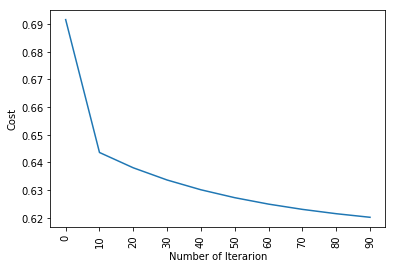

{'weight': array([[ 1.17236152],
       [ 0.06839891],
       [-0.11446481],
       [ 0.27201772],
       [ 1.28435836]]), 'bias': -0.30652823643905774}
train accuracy: 68.26347305389221 %
test accuracy: 69.46107784431138 %


{'bias': -0.30652823643905774, 'weight': array([[ 1.17236152],
        [ 0.06839891],
        [-0.11446481],
        [ 0.27201772],
        [ 1.28435836]])}

In [106]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100)

In [94]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.6946107784431138 
train accuracy: 0.6931137724550899 


# 对每一个任务点，令y=1，计算合理的price是多少

In [102]:
outcome=data
outcome['reasonable_price']=np.nan
outcome.head()


,concentration_rank,distance_to_customer,customer_credit,customer_quota,price,reasonable_price
0,56.0,0.000004,590.9753,39,66.0,NaN
1,148.0,0.000027,301.7301,28,65.5,NaN
2,61.0,0.000047,45137.6401,283,65.5,NaN
3,55.0,0.000018,921.7354,48,75.0,NaN
4,45.0,0.000007,953.1533,47,65.5,NaN


In [135]:
coefficient=logreg.coef_
intercept=logreg.intercept_
print(coefficient,intercept)
coefficient[0,4]

[[ 1.41247744  0.33323155 -0.73258358  0.96467996  1.88943585]] [-0.58465953]


1.8894358522808954

In [136]:
for i in range(len(outcome)):
    outcome.loc[i,'reasonable_price']=(-intercept-np.dot(coefficient[0,0:4],X[i,0:4]))/coefficient[0,4]

In [137]:
outcome

,concentration_rank,distance_to_customer,customer_credit,customer_quota,price,reasonable_price
0,56.0,4.277028e-06,590.9753,39,66.0,0.247257
1,148.0,2.673967e-05,301.7301,28,65.5,0.171798
2,61.0,4.748009e-05,45137.6401,283,65.5,0.302151
3,55.0,1.806610e-05,921.7354,48,75.0,0.242946
4,45.0,7.038898e-06,953.1533,47,65.5,0.252874
5,46.0,7.097763e-06,1219.4266,61,75.0,0.242481
6,40.0,6.883976e-06,11220.9286,132,65.5,0.248453
7,49.0,1.950613e-05,781.0970,50,65.5,0.245960
8,9.0,9.279042e-04,234.8440,26,66.0,0.297414
9,32.0,2.848010e-05,169.8312,20,66.0,0.281316


In [141]:
for i in range(len(outcome)):
    outcome.loc[i,'reasonable_price']=outcome.loc[i,'reasonable_price']*(np.max(data.loc[:,'price'])-np.min(data.loc[:,'price']))+np.min(data.loc[:,'price'])

In [142]:
outcome

,concentration_rank,distance_to_customer,customer_credit,customer_quota,price,reasonable_price
0,56.0,4.277028e-06,590.9753,39,66.0,69.945146
1,148.0,2.673967e-05,301.7301,28,65.5,68.435961
2,61.0,4.748009e-05,45137.6401,283,65.5,71.043012
3,55.0,1.806610e-05,921.7354,48,75.0,69.858914
4,45.0,7.038898e-06,953.1533,47,65.5,70.057479
5,46.0,7.097763e-06,1219.4266,61,75.0,69.849627
6,40.0,6.883976e-06,11220.9286,132,65.5,69.969067
7,49.0,1.950613e-05,781.0970,50,65.5,69.919201
8,9.0,9.279042e-04,234.8440,26,66.0,70.948290
9,32.0,2.848010e-05,169.8312,20,66.0,70.626325
